In [234]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

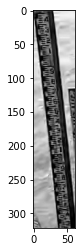

In [235]:
img = cv2.imread("F:/vinAI/water-level/data/ruler.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.convertScaleAbs(gray)
plt.imshow(gray,cmap='gray')

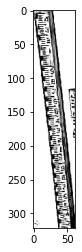

In [236]:
sharpeningKernel = np.array(([0, -1, 0],[-1, 7, -1],[0, -1, 0]), dtype="int")
output = cv2.filter2D(gray, -1, sharpeningKernel)
cv2.imwrite("F:/vinAI/water-level/data/sharpening.jpg",output)
plt.imshow(output,cmap='gray')

In [237]:
def canny_edge_detection(img, blur_ksize, threshold1, threshold2, skipping_threshold):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img,(blur_ksize,blur_ksize),0)
    plt.imshow(img_gaussian)
    plt.show()
    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
#     for i in range(img_canny.shape[0]):
#         for j in range(img_canny.shape[1]):
#             if img_canny[i][j] < skipping_threshold:
#                 img_canny[i][j] = 0
    return img_canny

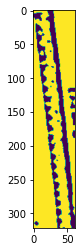

[array([  0.,   5.,  35., 292.]), array([ 23.,   6.,  56., 321.]), array([ 36.,  54.,  57., 255.])]


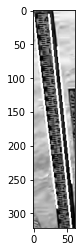

In [255]:
img_blur = cv2.GaussianBlur(output,(15,15),0)
binary = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,15,5)
img_canny = canny_edge_detection(binary, 1, 100, 200, 30)
plt.imshow(img_canny,cmap='gray')
lines = cv2.HoughLinesP(img_canny,rho=1,theta=np.pi/180,threshold=100,minLineLength=50,maxLineGap=70)
# print(lines)
vertical_lines = np.empty((0,4)) 
img_vertical = gray.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
#         if y1-y2<=10 and y1-y2>=-10:
#             cv2.line(img_horizontal,(x1,y1),(x2,y2),(0,0,255),1)
#             horizontal_lines = np.append(horizontal_lines,[[x1,y1,x2,y2]],axis=0)
        if x1-x2<=40 and x1-x2>=-40:
#             cv2.line(img_vertical,(x1,y1),(x2,y2),(255,0,0),1)
            vertical_lines = np.append(vertical_lines,[[x1,y1,x2,y2]],axis=0)
vertical_lines = sorted(vertical_lines, key=operator.itemgetter(0))
del(vertical_lines[2])
print(vertical_lines)
for line in vertical_lines:
#     for x1,y1,x2,y2 in line:
    cv2.line(img_vertical,(int(line[0]),int(line[1])),(int(line[2]),int(line[3])),(255,255,0),2)

cv2.imwrite("F:/vinAI/water-level/data/vertical.jpg",img_vertical)
plt.imshow(img_vertical,cmap='gray')
plt.show()

In [239]:
#Check direction of a point with respect to a line
LEFT = 1
RIGHT = -1
ZERO = 0

def directionOfPoint(A, B, P):

    global RIGHT, LEFT, ZERO

    # Subtracting co-ordinates of 
    # point A from B and P, to 
    # make A as origin
    B[0] -= A[0]
    B[1] -= A[1]
    P[0] -= A[0]
    P[1] -= A[1]

    # Determining cross Product
    cross_product = B[0] * P[1] - B[1] * P[0]

    # Return RIGHT if cross product is positive
    if (cross_product > 0):
        return RIGHT

    # Return LEFT if cross product is negative
    if (cross_product < 0):
        return LEFT

    # Return ZERO if cross product is zero
        return ZERO

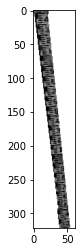

In [256]:
img_vertical = cv2.imread("F:/vinAI/water-level/data/vertical.jpg")
for x in range(img_vertical.shape[1]):
    for y in range(img_vertical.shape[0]):
        d1 = directionOfPoint([vertical_lines[0][0],vertical_lines[0][1]]
                               ,[vertical_lines[0][2],vertical_lines[0][3]],[x,y])
        d2 = directionOfPoint([vertical_lines[1][0],vertical_lines[1][1]]
                               ,[vertical_lines[1][2],vertical_lines[1][3]],[x,y])
        if d1==-1 or d2==1:
            img_vertical[y][x]= [255,255,255]
cv2.imwrite("F:/vinAI/water-level/data/vertical_remove_background.jpg",img_vertical)
plt.imshow(img_vertical,cmap='gray')
plt.show()

# Process horizontal lines

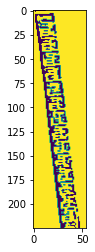

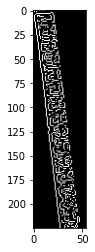

In [230]:
img_vertical = cv2.imread("F:/vinAI/water-level/data/vertical_remove_background.jpg")
img_blur = cv2.GaussianBlur(img_vertical,(5,5),0)
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
gray = cv2.convertScaleAbs(gray)
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,3,3)
img_canny = canny_edge_detection(binary, 1, 100, 200, 30)
plt.imshow(img_canny,cmap='gray')
plt.show()

[[[  9 224  53  16]]

 [[  0 224   0   0]]

 [[ 28   0  52 224]]

 [[  1   0   4 224]]

 [[  2   2  10 224]]

 [[ 25   0  49 224]]

 [[ 34   0  53 188]]

 [[  3  20  18 224]]

 [[ 11   1  45 216]]

 [[ 28   2  51 224]]

 [[ 38   0  53 177]]

 [[ 30   0  53 193]]

 [[ 26   0  50 224]]

 [[  3   1  19 224]]

 [[ 23   0  45 210]]

 [[  5   1  41 224]]

 [[  4   1  23 224]]

 [[  7   1  42 224]]

 [[ 41   0  53 148]]

 [[ 39   0  53 166]]

 [[ 22   0  45 224]]

 [[  5   3  40 224]]

 [[ 42   0  53 131]]

 [[  4  36  11 224]]

 [[  6  20  38 224]]

 [[  9   1  44 223]]

 [[ 48   0  53 108]]

 [[  8   1  43 223]]

 [[ 10  53  34 224]]

 [[ 44   0  53 114]]

 [[  3  22   6 224]]

 [[  5   9  20 224]]

 [[ 24   0  48 224]]

 [[ 33   0  52 219]]

 [[ 11   3  45 217]]

 [[ 15   0  44 204]]

 [[  1 224   1  53]]

 [[ 37   0  53 224]]

 [[ 10  52  37 224]]

 [[  6  65  12 224]]

 [[ 14 111  26 224]]

 [[  2 224   2 110]]

 [[ 11  91  20 222]]

 [[ 16   0  46 212]]

 [[ 13   1  43 195]]

 [[ 16 108

C:\Users\LaptopAZ.vn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in int_scalars
  


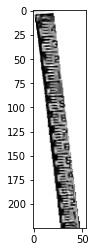

In [233]:
lines = cv2.HoughLinesP(binary,rho=1,theta=np.pi/180,threshold=30,minLineLength=100,maxLineGap=50)
print(lines)
horizontal_lines = np.empty((0,4)) 
img_horizontal = img_vertical.copy()
# img_vertical = img.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        if (y2-y1)/(x2-x1)<=0.001 and (y2-y1)/(x2-x1)>=-0.001:
            cv2.line(img_horizontal,(x1,y1),(x2,y2),(0,0,255),1)
            horizontal_lines = np.append(horizontal_lines,[[x1,y1,x2,y2]],axis=0)
print(horizontal_lines)
plt.imshow(img_horizontal,cmap='gray')
plt.show()